In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

## Implementations


In [2]:
#sys.path
#sys.path.append('Desktop/USFSenior/CS663-02')

from cluster import cluster

In [3]:
# inherits from cluster parent class
class KMeans(cluster):
    def __init__(self, k=5, max_iterations=100): # child class no longer inherits parent's __init__() function
        
        #super().__init__(self) makes child class inherit all methods and properties from its parent
        
        # target number of cluster centroids
        self.k = k 
        
        # maximum number of times to execute convergence attempt
        self.max_iterations = max_iterations 
    
    def fit(self, X):
        numRows = len(X)
        numCols = len(X[1])
        
        K = self.k
        maxIter = self.max_iterations

        # initialize cluster means by selecting K training examples at random
        prm = np.random.permutation(numRows) # list of observations in randomly permuted order
        clusterMeans = np.zeros((K, numCols))
        
        for k in range(K): # place K=5 centroids randomly
            idx = prm[k]
            clusterMeans[k,:] = X[idx,:]
        
        clusters = np.zeros(numRows).astype(int) 
        
        for n in range(maxIter):
            # assign each observation to a cluster
            for idx in range(numRows):
                vec = X[idx,:] # each feature vector
                
                # figure out which cluster the current obs should be assigned to
                distances = np.zeros(K)
                
                for k in range(K):
                    mean_k = clusterMeans[k,:]
                    distances[k] = np.linalg.norm(vec - mean_k)
                
                if idx == 0:
                    print('Figuring which cluster obs 1 should belong:\n ', distances)
                
                clusters[idx] = np.argmin(distances) # returns indices of the min element of the array
            
            
            # now recompute cluster means for each cluster
            for k in range(K):
                whr = np.where(clusters == k) # list containing the indices of obs who belong to cluster k
                whr = whr[0]
                
                mean_k = np.mean(X[whr,:], axis = 0)
                clusterMeans[k,:] = mean_k
                           
            return clusters, clusterMeans
        
    def fit_extended(self, X, balanced = False):
        
        numRows = len(X)
        numCols = len(X[1])

        K = self.k
        maxIter = self.max_iterations

        if balanced == True:
            avgSize = len(X)//K # double slash indicates floor division (rounds down to nearest whole #)

            # initialize cluster means by selecting K training examples at random
            prm = np.random.permutation(numRows) # list of observations in randomly permuted order
            clusterMeans = np.zeros((K, numCols))

            for k in range(K): 
                idx = prm[k]
                clusterMeans[k,:] = X[idx,:] # get K centroids

            clusters = np.zeros(numRows).astype(int) 
            temp_clusters = np.zeros(numRows).astype(int)

            for n in range(maxIter):
                # assign each observation to a cluster
                for idx in range(numRows):
                    vec = X[idx,:] # each feature vector

                    # figure out which cluster the current obs should be assigned to
                    distances = np.zeros(K)

                    for k in range(K):
                        mean_k = clusterMeans[k,:]
                        distances[k] = np.linalg.norm(vec - mean_k)

                    clusters[idx] = np.argmin(distances) # returns indices of the min element (shortest distance) of the array
                    #temp_clusters[idx] = np.argmax(distances)

                # temp_clusters = size of current clusters  
                clusterSizes = [0] * K

                # count number of observations per cluster
                for obs in clusters:
                    clusterSizes[obs] += 1
                print("Size of current clusters: ", clusterSizes)
                
                for k in range(K):

                    whr = np.where(clusters == k) # indices of observations that belong to cluster k
                    whr = whr[0]

                    x_vecs = arr[whr,:] # array of points in cluster k
                    pt_distances = np.zeros(len(x_vecs))

                    for point in x_vecs:  # for each feature vector in cluster k
                        mean_k = clusterMeans[k,:] # get cluster k centroid
                        
                        # calculate distance to cluster k centroid
                        pt_distances[point] = np.linalg.norm(point - mean_k)
                        
                    # remove furthest point from current cluster
                    
                    
                    # if all clusters are full, insert point to the smallest cluster
        
            return clusters, clusterMeans
        
        else:
            fit(X)

In [4]:
# create 5 clusters
kmeans = KMeans()

In [5]:
df = pd.read_csv('historical-weather.csv')
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8


In [6]:
df.tail()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7
15872,1587200,2014-09-10 23:03:29,915.9,75.74,335.0,0.9,348.0,1.1,322.0,0.7,0.0,0.0,47.8


In [7]:
df.shape

(15873, 13)

In [8]:
df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [9]:
df.hpwren_timestamp.unique()
# dataset contains observations from a single day

array(['2011-09-10 00:00:49', '2011-09-10 01:40:49',
       '2011-09-10 03:20:49', ..., '2014-09-10 19:43:29',
       '2014-09-10 21:23:29', '2014-09-10 23:03:29'], dtype=object)

In [10]:
# each feature vector x_i is a vector in R^d which describes a particular time of day's weather
# there are d=11 features that describe each of the n instances

# extract relevant features for clustering
features = df.iloc[:, [2,3,4,5,6,7,12]]
features

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
1,911.8,62.96,95.0,2.3,106.0,2.5,63.9
2,911.4,68.00,53.0,0.3,69.0,0.5,33.4
3,911.4,64.22,191.0,2.8,197.0,2.9,58.2
4,912.2,52.70,181.0,1.5,191.0,2.0,89.8
...,...,...,...,...,...,...,...
15868,914.3,77.18,225.0,5.2,238.0,6.0,43.2
15869,914.4,77.00,190.0,1.5,196.0,1.7,42.8
15870,914.9,75.92,344.0,0.4,352.0,0.6,43.9
15871,915.7,75.38,13.0,1.5,24.0,1.7,46.7


In [11]:
# observe which features have missing info 
features.isna().sum()

air_pressure          0
air_temp              0
avg_wind_direction    3
avg_wind_speed        3
max_wind_direction    3
max_wind_speed        3
relative_humidity     0
dtype: int64

In [12]:
features.loc[(features.avg_wind_direction.isna() == True)]

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
791,911.1,48.92,NaN,NaN,NaN,NaN,91.4
6441,917.8,49.82,NaN,NaN,NaN,NaN,90.9
12766,916.8,44.06,NaN,NaN,NaN,NaN,91.1


In [13]:
# since there are only 3 observations with NAs, we'll ignore them for now
featuresCleaned = features.dropna(axis = 0)
featuresCleaned.shape

(15870, 7)

In [14]:
# standardize the data
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(featuresCleaned) # compute the mean and std to be used for later scaling
scaled_features = scaler.transform(featuresCleaned) # perform standardization by centering and scaling
print(len(scaled_features))

15870


In [16]:
scaled_features.mean(axis = 0)

array([ 2.54308931e-14,  5.58763286e-16, -1.03872662e-16, -7.16363187e-18,
       -3.58181593e-17,  3.22363434e-17, -5.90999629e-17])

In [17]:
scaled_features.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1.])

In [18]:
# call the self-implemented fit function
clusters, clusterMeans = kmeans.fit(scaled_features) # pass scaled data in for clustering
np.set_printoptions(threshold=np.inf)
print('Cluster hypotheses:\n ', clusters)

Figuring which cluster obs 1 should belong:
  [2.31718078 3.32764076 3.88254628 4.27176627 2.50484912]
Cluster hypotheses:
  [0 4 0 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 3 0 0 1 0 1 1 1 1 0 2
 2 2 2 0 0 1 3 1 3 0 3 1 3 2 2 2 2 0 0 0 3 0 0 0 0 0 3 0 4 2 3 0 0 0 3 0 0
 0 3 3 3 0 4 4 2 4 4 0 0 4 3 4 4 4 3 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3
 2 4 1 0 0 0 0 0 0 0 3 1 1 2 3 3 0 0 1 0 0 0 0 1 0 3 0 3 2 3 0 0 0 0 0 0 0
 0 3 0 0 2 0 3 0 0 0 0 0 0 3 0 0 0 0 2 2 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 1 1 0 0 0 0 0 0 1 1 2 3 2 1 1 1 2 2 2 2 0 2 2 2 2 2 2 4 0 0 0 4 4 4 4 4 4
 3 2 4 2 4 4 4 4 4 4 4 4 4 4 3 4 2 3 2 0 0 0 0 0 1 1 0 1 0 0 0 0 3 0 0 0 1
 0 1 1 1 1 1 0 0 2 2 2 2 1 1 1 1 0 2 0 1 1 1 0 0 1 1 1 1 0 1 0 1 2 2 3 0 0
 1 0 0 0 0 0 0 0 3 0 3 1 3 2 0 0 0 0 0 0 0 0 0 0 3 1 1 3 2 0 2 0 0 0 1 3 0
 3 2 2 2 2 3 0 4 4 4 3 3 4 4 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 4 2
 2 2 4 4 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 0 0 3 3 3 4 1 1 0 0 1 3 0 0 3 1
 3 3 3 1 1 0 1 0 3 1 1 1 0 0 3 3 2 3 0 1 1 0 0 0 0

In [19]:
print('Cluster centroid values:\n ', clusterMeans)

Cluster centroid values:
  [[-0.16488521  0.70821153 -0.7551368  -0.72395212 -0.82568177 -0.73495289
  -0.3477571 ]
 [ 0.9979902   0.06887643 -0.70166259  0.23305945 -0.81696976  0.26631571
  -0.94954873]
 [-0.36214302  0.16819395  0.36995116  1.23818307  0.45761963  1.19225988
   0.09702007]
 [ 0.33697456  0.17272819  1.1014392  -0.63470605  1.29314511 -0.59958984
  -0.19875995]
 [-0.61170241 -0.91102695  0.22290653 -0.1210452   0.18540015 -0.12575018
   1.13164705]]


In [20]:
from sklearn.datasets.samples_generator import make_blobs

In [21]:
X, cluster_assignments = make_blobs(n_samples = 200, centers = 4, cluster_std = 0.60, random_state = 0)

In [22]:
print('X: \n', X)
print(len(X))
print("Sklearn's cluster hypotheses:\n ", cluster_assignments) # expected target output

X: 
 [[ 2.23421043e+00  1.69349520e+00]
 [-1.05510724e+00  2.63803080e+00]
 [ 1.08272576e+00  4.06271877e+00]
 [-2.60159431e+00  7.22195591e+00]
 [ 1.60841463e+00  4.01800537e-01]
 [ 9.82570091e-01  5.37530962e+00]
 [-1.71343572e+00  2.97632236e+00]
 [ 4.43598630e-01  3.11530945e+00]
 [ 1.71444449e+00  5.02521524e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [ 5.95676822e-01  4.08614263e+00]
 [ 2.43040639e+00 -6.35709334e-02]
 [-2.10047101e+00  2.71029320e+00]
 [-2.45138222e+00  2.95583946e+00]
 [ 3.20903274e+00  1.78597253e+00]
 [ 1.86922139e+00  5.44132083e+00]
 [-1.46707190e+00  7.92948233e+00]
 [-1.25766504e+00  7.93201692e+00]
 [-1.40889590e+00  7.15865322e+00]
 [ 1.53853211e+00  2.04370263e+00]
 [-1.68001841e+00  7.34766422e+00]
 [-8.35505074e-01  3.56565342e+00]
 [ 1.84287117e+00  7.26928839e-02]
 [-1.23065895e+00  2.84821990e+00]
 [ 2.62492001e+00  9.50194405e-01]
 [ 1.78194802e+00  9.08151155e-01]
 [-4.29536666e-01  7.42179050e+00]
 [ 1.63852681e+00  8.07882936e-01]
 [ 1.16051297e+

In [23]:
c_count = [0] * 4
for c in cluster_assignments:
    c_count[c] += 1

print(c_count)

[50, 50, 50, 50]


In [24]:
file1 = open("kmeans.txt", "w")

kmeans2 = KMeans(4, 100)
for n in range(10): # 10 iterations of my implementation
    cluster, clusterMeans = kmeans2.fit(X)
    print(cluster, clusterMeans)
    line1 = "Cluster hypotheses: {} \n".format(str(cluster))
    file1.write(line1)
    line2 = "Cluster centroids: {} \n".format(str(clusterMeans))
    file1.write(line2)
  
    clusterCount = [0] * 4
    for c in cluster:
        clusterCount[c] += 1

    print('Iteration', n, clusterCount)
    
    line3 = 'Iteration {}: {}\n'.format(n, str(clusterCount))
    file1.write(line3 + '\n')

file1.close()

Figuring which cluster obs 1 should belong:
  [2.87940611 3.81827301 1.95159768 0.68277569]
[3 1 0 0 3 0 1 0 0 2 0 3 1 1 3 0 0 0 0 3 0 1 3 1 3 3 0 3 3 0 0 0 1 3 1 0 1
 2 0 0 0 0 0 0 3 1 2 0 0 0 0 1 1 0 2 0 1 3 0 3 0 0 3 0 0 0 3 0 1 1 3 3 2 0
 1 0 1 1 3 3 0 0 3 1 1 0 2 3 1 1 0 0 0 0 0 3 1 0 2 0 0 3 3 0 0 1 0 3 3 0 0
 1 1 3 3 0 1 1 0 0 0 1 0 3 0 1 2 1 3 0 1 3 0 0 0 1 0 0 3 0 3 1 3 3 1 3 0 3
 1 0 0 0 2 1 3 0 0 1 0 3 0 3 3 1 1 0 2 3 3 1 3 2 1 0 0 0 0 0 1 0 0 3 0 3 0
 1 1 0 0 0 3 3 0 0 1 1 1 0 0 3] [[-0.44163191  6.23517791]
 [-1.68075067  2.91153498]
 [ 1.60358649  3.86804059]
 [ 2.07187892  0.97422926]]
Iteration 0 [91, 48, 11, 50]
Figuring which cluster obs 1 should belong:
  [3.91255657 4.28964427 3.76555626 2.35096515]
[3 0 3 1 3 2 0 3 2 2 3 3 0 0 3 2 2 2 1 3 1 1 3 0 3 3 2 3 3 2 2 2 0 3 0 2 0
 2 3 2 2 2 2 3 3 0 3 1 1 2 2 0 1 2 3 1 1 3 2 3 1 3 3 2 2 3 3 1 1 0 3 3 2 3
 0 2 0 1 3 3 2 2 3 3 0 3 2 3 0 0 2 2 1 3 2 3 0 1 3 3 2 3 3 1 2 0 3 3 3 3 2
 0 0 3 3 2 0 0 1 3 2 0 3 3 3 1 3 0 3 2 1 3 3 2

In [ ]:
file2 = open("kmeans_extended.txt", "w")

kmeans2 = KMeans(4, 100)
for n in range(10): # 10 iterations of my implementation
    cluster, clusterMeans = kmeans2.fit_extended(X, True)
    print(cluster, clusterMeans)
    line1 = "Cluster hypotheses: {} \n".format(str(cluster))
    file2.write(line1)
    line2 = "Cluster centroids: {} \n".format(str(clusterMeans))
    file2.write(line2)
  
    clusterCount = [0] * 4
    for c in cluster:
        clusterCount[c] += 1

    print('Iteration', n, clusterCount)
    
    line3 = 'Iteration {}: {}\n'.format(n, str(clusterCount))
    file2.write(line3 + '\n')

file2.close()

In [28]:
# import sklearn's K-Means 
from sklearn.cluster import KMeans as sk_KMeans

[1 0 3 2 1 3 0 3 3 3 3 1 0 0 1 3 2 2 2 1 2 0 1 0 1 1 2 1 1 3 2 3 0 1 0 3 0
 3 3 2 2 2 2 3 1 0 3 2 2 3 2 0 0 2 3 2 0 1 3 1 2 3 1 3 2 3 1 2 0 0 1 1 3 3
 0 2 0 0 1 1 2 3 1 0 0 3 3 1 0 0 2 2 2 3 3 1 0 2 3 3 2 1 1 2 2 0 3 1 1 3 2
 0 0 1 1 3 0 0 2 3 2 0 3 1 3 0 3 0 1 3 0 1 0 2 2 0 2 2 1 2 1 0 1 1 0 1 3 1
 0 2 2 2 3 0 1 3 2 0 2 1 2 1 1 0 0 2 3 1 1 0 1 3 0 2 2 2 3 3 0 3 0 1 3 1 3
 0 0 2 3 2 1 1 3 2 0 0 0 3 2 1]
[[-1.62401415  2.9159629 ]
 [ 2.07187892  0.97422926]
 [-1.34842715  7.72096548]
 [ 0.90793962  4.35713791]]


Text(0.5, 1.0, "Sklearn's K-Means on Sample 2D Data")

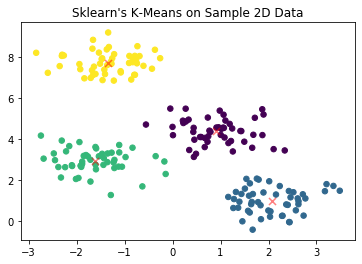

In [48]:
# compare between self-implementation and sklearn's K-Means on sample generated data X
# display clustering pattern of sklearn's clustering function when k=4 
sk_kmeans = sk_KMeans(n_clusters=4, random_state=0).fit(X) # pass scaled air pressure and temp. for clustering
sk_labels = sk_kmeans.labels_
print(sk_labels)

sk_centroids = sk_kmeans.cluster_centers_
print(sk_centroids)

plt.scatter(X[:,0], X[:,1], c = cluster_assignments, s = 30)
plt.scatter(sk_centroids[:,0], sk_centroids[:,1], c = 'red', s = 50, alpha = 0.5, marker = 'x')
plt.title("Sklearn's K-Means on Sample 2D Data")

In [45]:
sk_kmeans # max iterations is set to 300

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Figuring which cluster obs 1 should belong:
  [4.85265819 3.01302919 3.04591633 1.43530327]


Text(0.5, 1.0, "Sklearn's K-Means on Sample 2D Data")

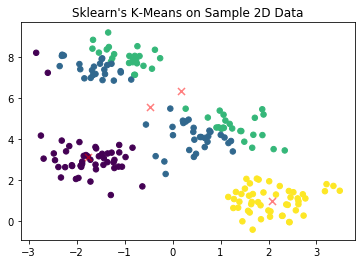

In [50]:
# display clustering pattern of self-implemented clustering function when k=4

kmeans3 = KMeans(4, 300)
cluster, clusterMeans = kmeans3.fit(X)
plt.scatter(X[:,0], X[:,1], c = cluster, s = 30)
plt.scatter(clusterMeans[:,0], clusterMeans[:,1], c = 'red', s = 50, alpha = 0.5, marker = 'x')
plt.title("Sklearn's K-Means on Sample 2D Data")

## Performance Analysis

In [27]:
# get subset of features for simple 2D visualization
subset_features = featuresCleaned.iloc[:,0:2]
scaler.fit(subset_features)
scaled_subset = scaler.transform(subset_features)
print(len(scaled_subset))
print(scaled_subset.mean(axis = 0))
print(scaled_subset.std(axis = 0))

15870
[2.54308931e-14 5.58763286e-16]
[1. 1.]


In [76]:
# run sklearn's K-Means on the dataset
sk_kmeans2 = sk_KMeans(n_clusters=5, random_state=0).fit(scaled_subset) # pass scaled air pressure and temp. for clustering
sk_labels2 = sk_kmeans2.labels_
sk_labels2

array([3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 1,
       1, 1, 1, 1, 1, 3, 3, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3,

In [77]:
sk_centroids2 = sk_kmeans2.cluster_centers_
sk_centroids2
# we can think of these as weather groups corresponding to different times of the day
# shows five weather groups on a standard normal scale

array([[ 1.55970341, -0.4142171 ],
       [ 0.08486924, -0.9319492 ],
       [-1.3253238 , -0.93898875],
       [-0.70545185,  0.72723187],
       [ 0.42644916,  0.94250461]])

In [78]:
# that's hard to read. let's get it back to original units
scaler.inverse_transform(sk_centroids2)

array([[921.58900212,  56.95533758],
       [917.08844847,  50.82824462],
       [912.78515152,  50.74493506],
       [914.6767316 ,  70.4637987 ],
       [918.13080211,  73.01144078]])

Text(0.5, 1.0, "Sklearn's K-Means on 2D subset of Historical Weather Data")

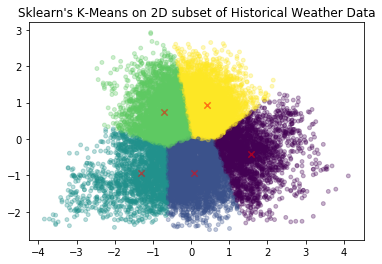

In [79]:
# display clustering pattern of sklearn's clustering function when k = 4
plt.scatter(scaled_subset[:,0], scaled_subset[:,1], c = sk_labels2, s = 15, alpha = 0.3)
plt.scatter(sk_centroids2[:,0], sk_centroids2[:,1], c = 'red', s = 40, alpha = 0.5, marker = 'x')
plt.title("Sklearn's K-Means on 2D subset of Historical Weather Data")

There seems to be quite minimal overlap between the clusters using sklearn's implementation.

Figuring which cluster obs 1 should belong:
  [1.16780961 1.07441765 2.17627856 1.97610306 1.78985381]


Text(0.5, 1.0, 'My K-Means on 2D subset of Historical Weather Data')

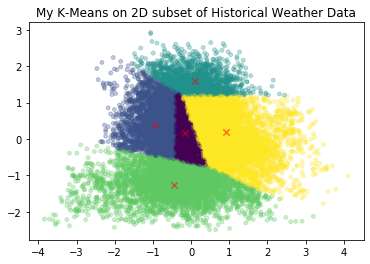

In [75]:
# display clustering pattern of self-implemented clustering function when k = 4
kmeans4 = KMeans(5, 300)
clusters, clusterMeans = kmeans4.fit(scaled_subset)
plt.scatter(scaled_subset[:,0], scaled_subset[:,1], c = clusters, s = 15, alpha = 0.3)
plt.scatter(clusterMeans[:,0], clusterMeans[:,1], c = 'red', s = 40, alpha = 0.5, marker = 'x')
plt.title("My K-Means on 2D subset of Historical Weather Data")

Similarly, there doesn't seem to be much overlap between the clusters. 

In [59]:
# finding optimal number of clusters
sum_of_squared_distances = pd.DataFrame(data = [], index = range(2, 21), columns = ['inertia'])

for k in range(2,21):
    sk_kmeansC = sk_KMeans(n_clusters = k)
    cutoff = 99
    sk_kmeansC.fit(scaled_subset)
    sum_of_squared_distances.loc[k] = sk_kmeansC.inertia_

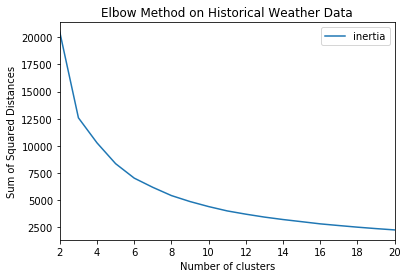

In [63]:
# can plot directly from pandas
ax = plt.gca()

sum_of_squared_distances.plot(kind='line', y='inertia', ax=ax)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method on Historical Weather Data")
plt.show()

Text(0.5, 1.0, "Sklearn's K-Means on 2D subset of Historical Weather Data")

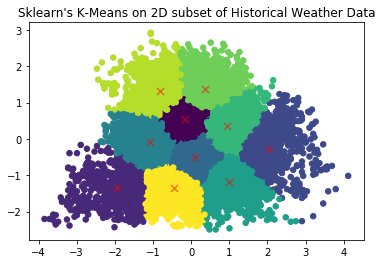

In [65]:
sk_kmeans3 = sk_KMeans(n_clusters=10, random_state=0).fit(scaled_subset) # pass scaled air pressure and temp. for clustering
sk_labels3 = sk_kmeans3.labels_
sk_centroids3 = sk_kmeans3.cluster_centers_

plt.scatter(scaled_subset[:,0], scaled_subset[:,1], c = sk_labels3, s = 30)
plt.scatter(sk_centroids3[:,0], sk_centroids3[:,1], c = 'red', s = 50, alpha = 0.5, marker = 'x')
plt.title("Sklearn's K-Means on 2D subset of Historical Weather Data")

It is hard to tell the exact optimal number of clusters as there seems to be a few values showing an elbow. This suggests we need another evaluation metric to find the best K in the context of this dataset. In other words, it is hard to identify the distinct weather groups (using air pressure and air temperature) in our given data of a specific day.